In [371]:
from scipy.fft import rfft,irfft, rfftfreq
import numpy as np
import wave
import pandas as pd
import sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import scipy.io.wavfile
import scipy.signal
from scipy.io.wavfile import write
from scipy.io import wavfile
import itertools


In [372]:
# ranges1=[[150,200],[1500,2000]]
# for range in ranges1:
#     print (range[0])
#     condition=(freq>range[0])&(freq<range[1])
#     y_sig[condition]=y_sig[condition]*var_scale


In [373]:
signal,sampling_rate=librosa.load("ttsMP3.com_VoiceText_2022-11-15_15_30_15 (1).mp3")
signalwav,sampling_ratewav=librosa.load("ttsMP3.com_VoiceText_2022-11-15_15_30_15.wav")

# D = librosa.stft(y)  # STFT of y
# S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

t=np.array(range(0,len(signal)))/sampling_rate
print(signal)
print(signalwav)
print(sampling_ratewav)
print(sampling_rate)



[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00]
[0. 0. 0. ... 0. 0. 0.]
22050
22050


In [374]:
ipd.Audio("ttsMP3.com_VoiceText_2022-11-15_15_30_15 (1).mp3")

In [375]:
y_sig= scipy.fft.rfft(signal)
mag=np.abs(y_sig)
phase=np.angle(y_sig)

y_sigwav= scipy.fft.rfft(signalwav)
magwav=np.abs(y_sigwav)
phasewav=np.angle(y_sigwav)

In [376]:
# a=[1,3,5,9]  #range freq
# b=list(np.where(a>3)[0]) #indeex of الى محقةة الشرط
# new_mag=np.abs(y_sig).copy()  

# c=[2,4,6,3] # magnitude

# for i in b:
#     c[i]=c[i]*2


In [377]:
freq= rfftfreq(len(signal),1/sampling_rate)
freq2= rfftfreq(len(signalwav),1/sampling_ratewav)


In [378]:
# condition=(freq>0)&(freq<1700)
# index_return=np.where((freq>800)&(freq<1000))

# y_sig[index_return]=y_sig[index_return]*1
# condition
# ranges1=[[10,40],[50,700],[4000,8500]]
ranges1=[[999,1000], [2999,3000], [5999,6000]]

new_mag=mag.copy()  
new_magwav=magwav.copy()  
def drop(slider_ranges,factor_slider, freq, new_mag):
    for range in slider_ranges:
        index=np.where((freq>range[0])&(freq<range[1]))
        
        # triangle_window=10**(factor_slider*scipy.signal.windows.triang(len(index)))
        triangle_window=10**(factor_slider*np.hanning(len(index)))
        # triangle_window=(factor_slider*np.hanning(len(index)))

        for i ,itr in zip(index,triangle_window):
            new_mag[i]=new_mag[i]*itr
        # for i in index:
        #     for (index,iter) in zip(index, triangle_window):
        #         new_mag[i]=new_mag[i]*triangle_window[iter]
            

            # print(i)

drop(ranges1,0, freq, new_mag)
drop(ranges1,0, freq2, new_magwav)

def invers (new_mag,phase):
    y2=np.multiply(new_mag,np.exp(1j*phase))
    inv_fourier_signal = np.real(scipy.fft.irfft(y2))
    return inv_fourier_signal

signalmp3back = invers(new_mag, phase)
signalwavback = invers(new_magwav, phasewav)



# ranges1=[[800,1200],[5500,6500],[6600,6800]]
# new_mag=np.abs(y_sig).copy()  

# for range in ranges1:
#     index=np.where((freq>range[0])&(freq<range[1]))
#     for i in index:
#         new_mag[i]=new_mag[i]*0
#     print (range)
    # a=[1,3,5,9]  #range freq
    # b=list(np.where(a>3)[0]) #indeex of الى محقةة الشرط
    # new_mag=np.abs(y_sig).copy()  

    # c=[2,4,6,3] # magnitude

    # for i in b:
    #     c[i]=c[i]*2
# print(ranges1[0][1])




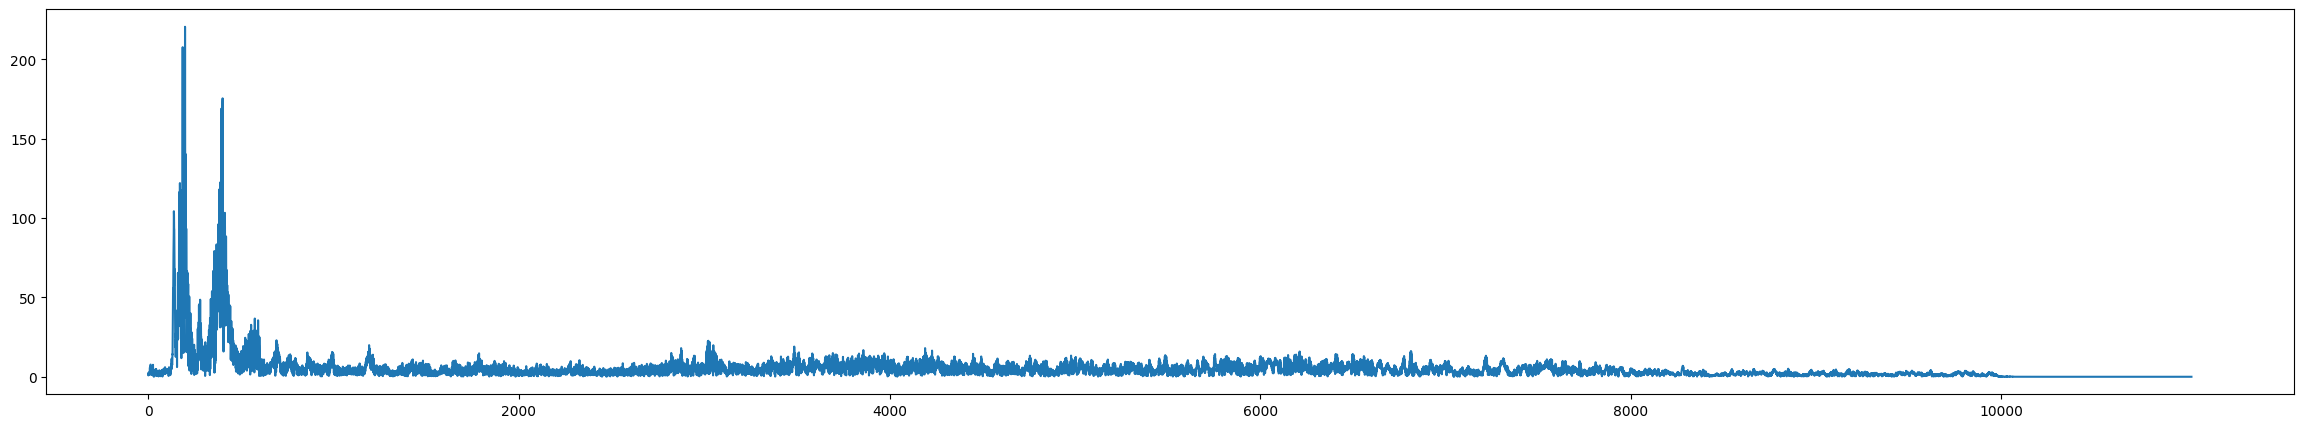

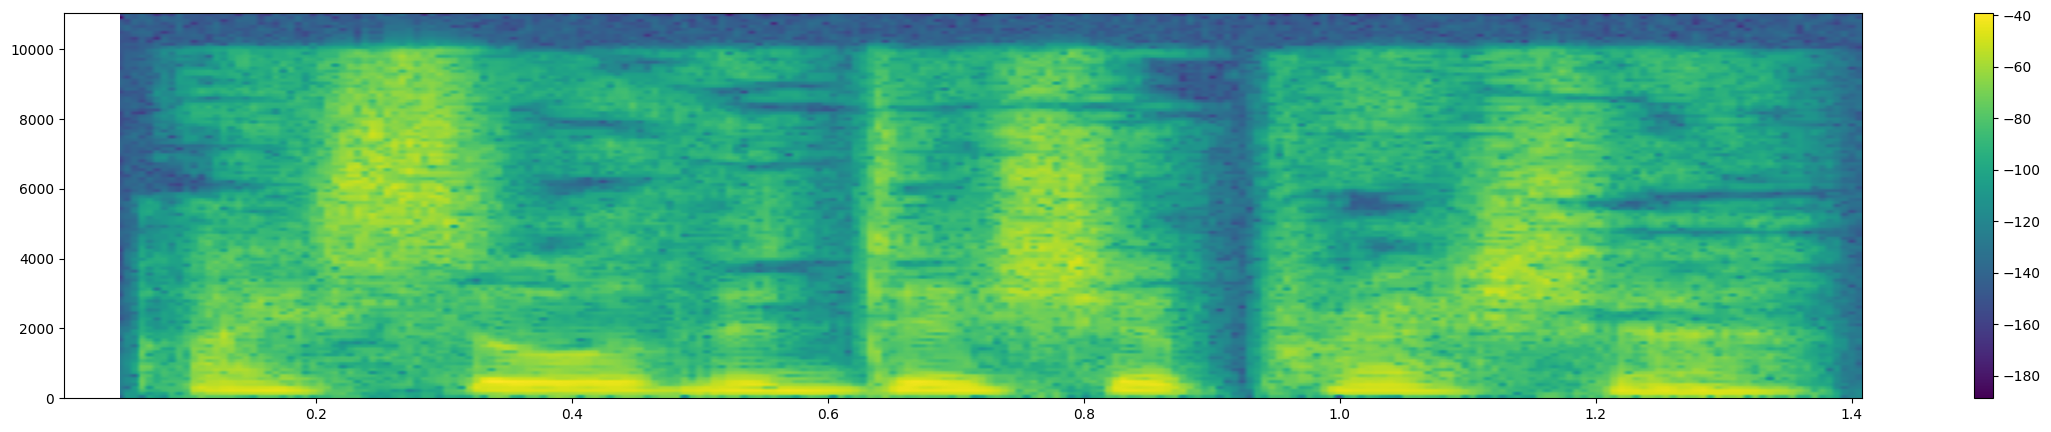

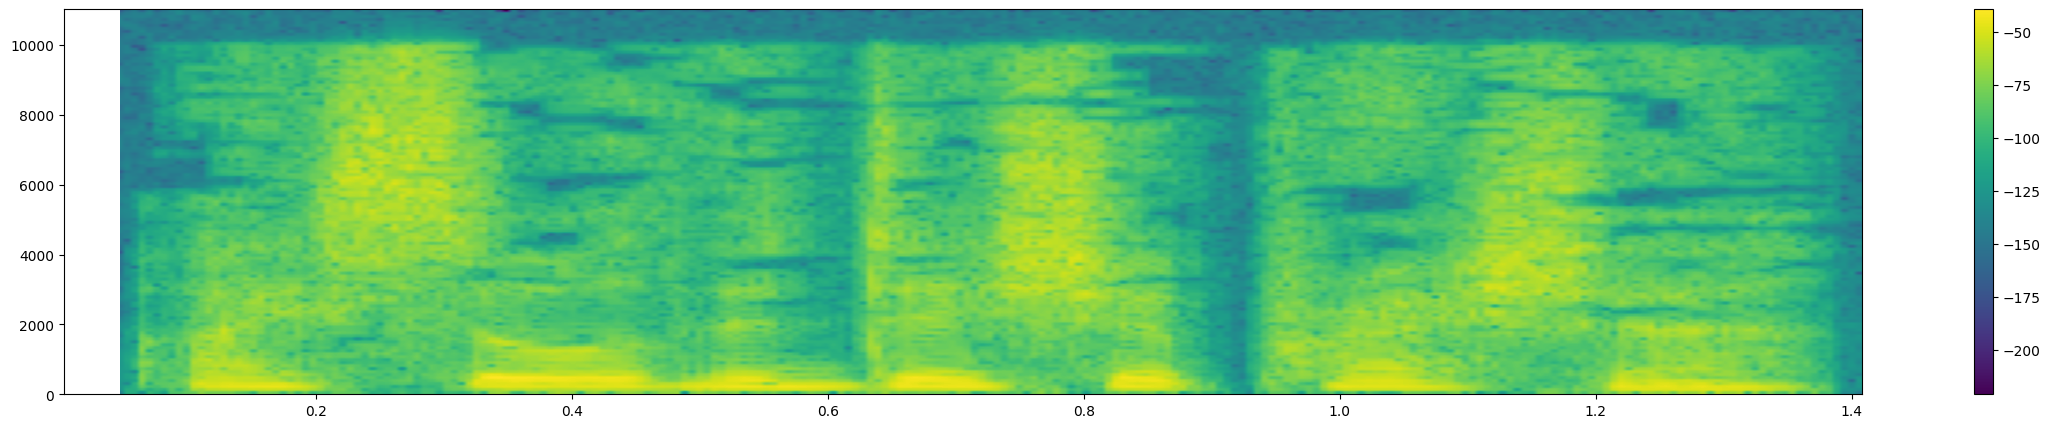

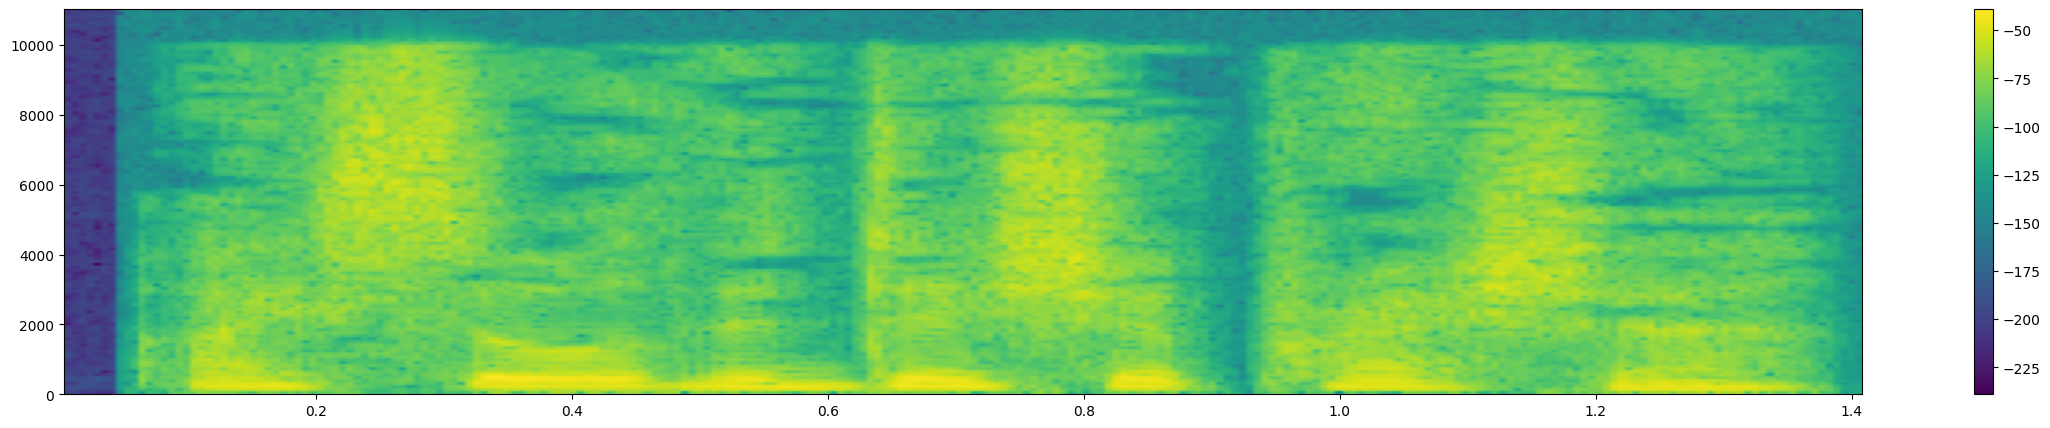

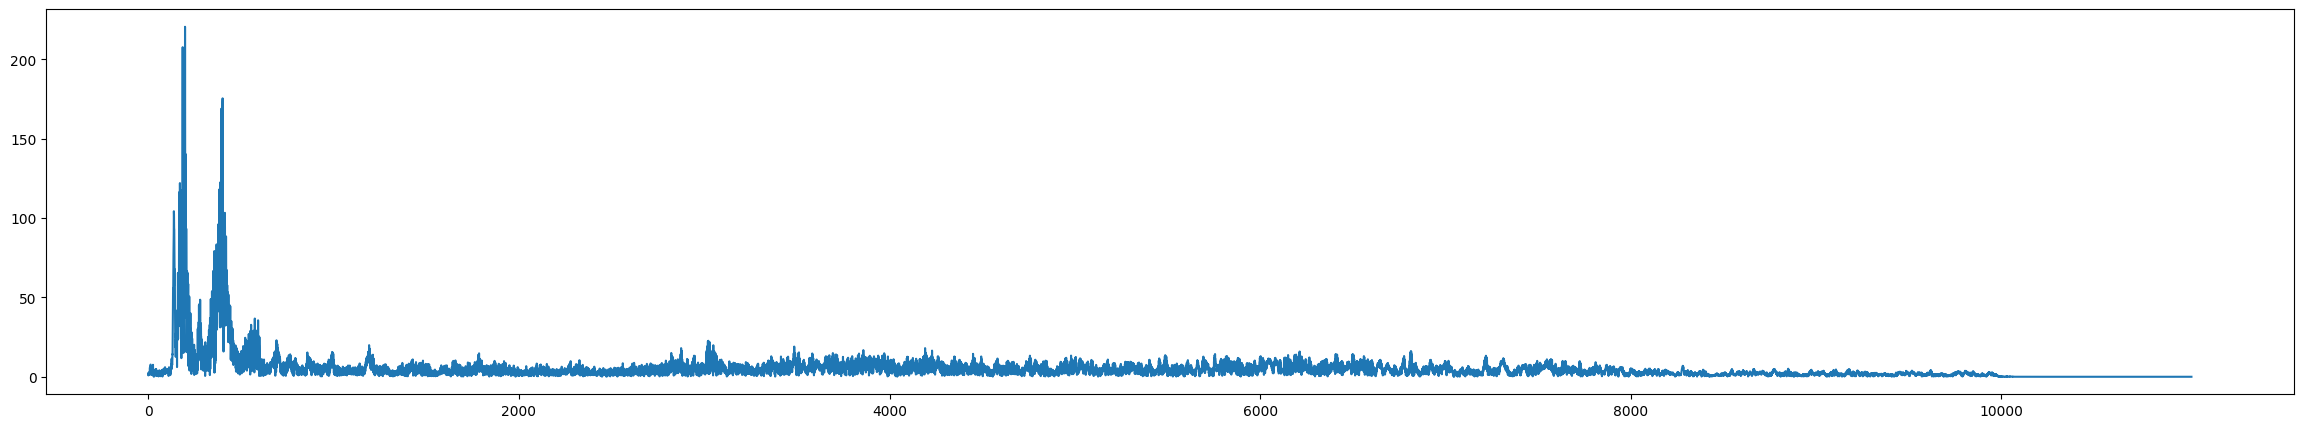

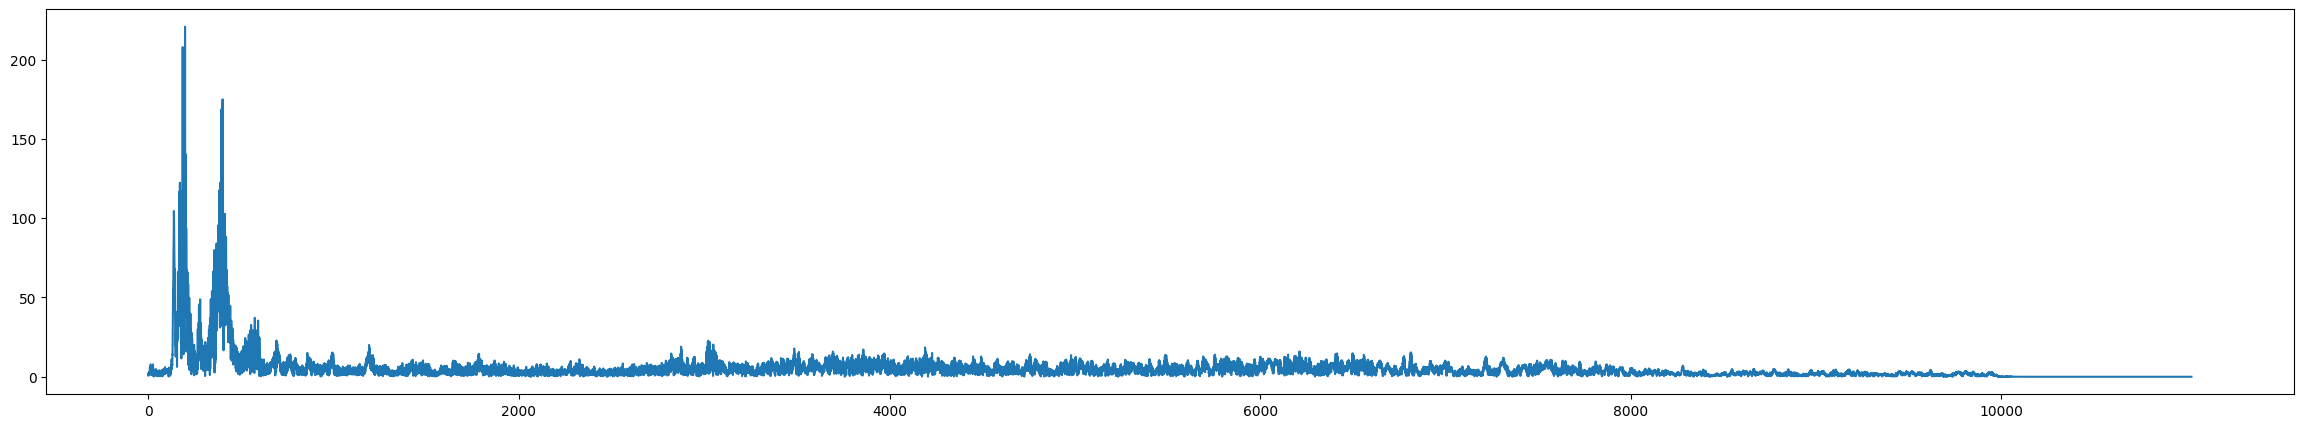

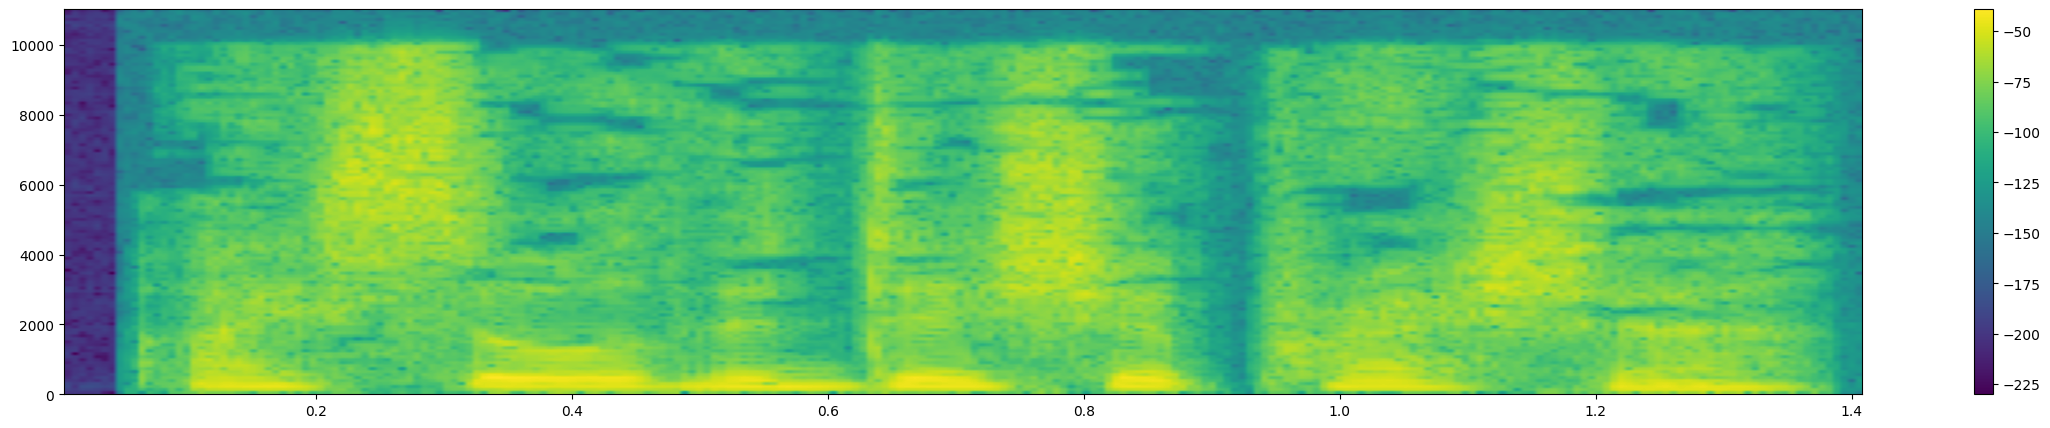

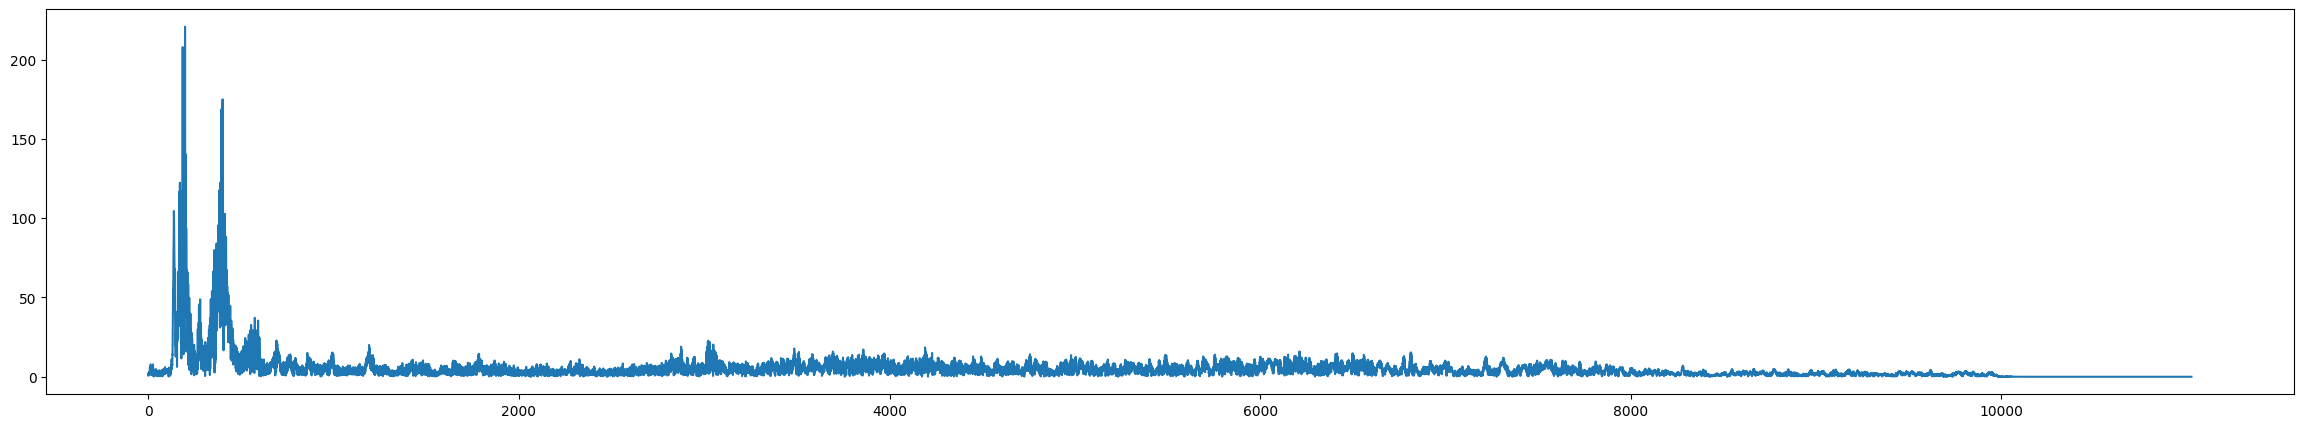

In [379]:
# plt.figure(figsize=(29,5))
# librosa.display.specshow(new_mag)


plt.figure(figsize=(29,5))
plt.plot(freq,mag)
plt.figure(figsize=(29,5))
plt.specgram(signal, Fs = sampling_rate)
plt.colorbar()
plt.figure(figsize=(29,5))
plt.specgram(signalwav, Fs = sampling_ratewav)
plt.colorbar()

plt.figure(figsize=(29,5))
plt.specgram(signalmp3back, Fs = sampling_rate)
plt.colorbar()

plt.figure(figsize=(29,5))
plt.plot(freq,new_mag)

plt.figure(figsize=(29,5))
plt.plot(freq2,magwav)
plt.figure(figsize=(29,5))
plt.specgram(signalwavback, Fs = sampling_ratewav)
plt.colorbar()

plt.figure(figsize=(29,5))
plt.plot(freq2,new_magwav)


In [380]:
# 
def invers (new_mag,phase):
    y2=np.multiply(new_mag,np.exp(1j*phase))
    inv_fourier_signal = np.real(scipy.fft.irfft(y2))
    return inv_fourier_signal

In [381]:
signall=invers(new_mag,phase)

In [382]:
# plt.figure(figsize=(29,5))
# plt.plot(t,y2)
ipd.Audio("ttsMP3.com_VoiceText_2022-11-15_15_30_15 (1).mp3")

In [383]:
write("youssef22.mp3",sampling_rate, signall.astype(np.float32))
ipd.Audio("youssef22.mp3")